# First steps with PyMC3 
Examples are taken from pymc3 tutorial: http://docs.pymc.io/notebooks/getting_started.html#A-Motivating-Example:-Linear-Regression.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

np.random.seed(123)
alpha, sigma  = 1, 1
beta = [1, 2.5]

size = 100

X1 = np.random.randn(size)

X2 = np.random.randn(size) * 0.2

Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

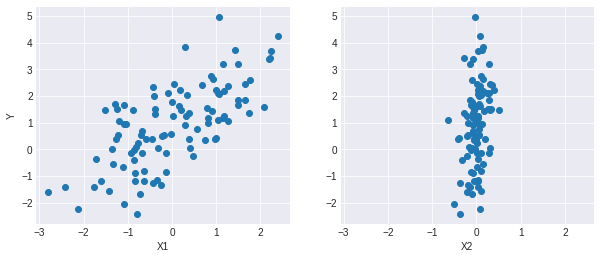

In [7]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [8]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.3


## Model Specification

### Context Manager
```with basic_model``` creates a context manager. This means all PyMC3 objects introduced in the indented code block are added to basic_model behind the scenes.
### Stochastic random variables:
```shape``` argument is available for all distros and specifies the length or shape of the random variable.
- Normal Distribution: pm.Normal(name_rv, mean, standard_deviation)
- Half Normal Distribution: pm.HalfNormal(name_rv, standard_deviation)

**Detailed notes about distributions, sampling methods and other PyMC3 functions are available via the ```help``` function, e.g. ```help(pm.Normal)```**

In [11]:
# Basic_model tries to predict outcomes of Y as normally-distributed observations with an expected value of µ
# that is a linear function of two predictor variables, X1 and X2.
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome, a deterministic random variable.
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations, Y_obs is an observed stochastic, which indicates that
    # the values for this variable were observed, and should not be changed by any fitting algorithm.
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

## Model Fitting
We will consider two approaches, whose appropriateness depends on the structure of the model and the goals of the analysis: finding the maximum a posteriori (MAP) point using optimization methods, and computing summaries based on samples drawn from the posterior distribution using Markov Chain Monte Carlo (MCMC) sampling methods.

In [13]:
# MAP model
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

logp = -149.58, ||grad|| = 12.242: 100%|██████████| 19/19 [00:00<00:00, 2706.37it/s]  


{'alpha': array(0.90660093),
 'beta': array([0.94848596, 2.60711845]),
 'sigma': array(0.96298858),
 'sigma_log__': array(-0.03771373)}

In [17]:
# Sampling using MCMC
with basic_model:
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/bpgraphexploration/anaconda3/envs/bpal/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_log__, beta, alpha]
100%|██████████| 1000/1000 [00:01<00:00, 909.87it/s]


## Posterior Analysis

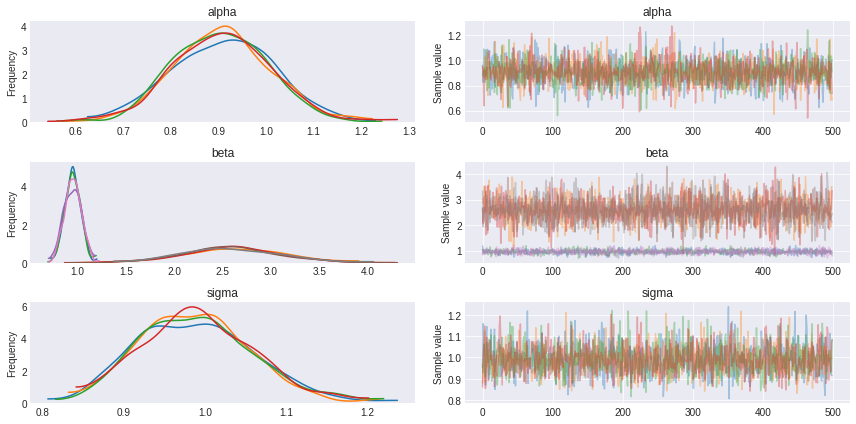

In [18]:
# The beta variable produces two histograms corresponding to both predictor coefficients.
_ = pm.traceplot(trace)

In [19]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.906129,0.103740,0.002106,0.700029,1.104545,2000.0,0.999703
beta__0,0.950912,0.085140,0.001553,0.786636,1.111879,2000.0,0.999647
beta__1,2.597491,0.505899,0.008376,1.665627,3.685574,2000.0,0.999544
sigma,0.989631,0.070008,0.001306,0.861387,1.128301,2000.0,0.999623
